# Module 3 Assessment Review

Made using resources from the Seattle team - thanks y'all.

In [1]:
# Initial imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Gradient Descent

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [32]:
# Let's create a linear regression model using just the horsepower column
from sklearn.linear_model import LinearRegression

X = mpg_df[['horsepower']]
y = mpg_df['mpg']

model = LinearRegression()
model.fit(X, y)

m = model.coef_[0] # Find the slope - coefficient for the single variable in X
b = model.intercept_ # Find the intercept

In [33]:
print(f'Slope: {m}')
print(f'Intercept: {b}')

Slope: -0.15784473335365365
Intercept: 39.93586102117047


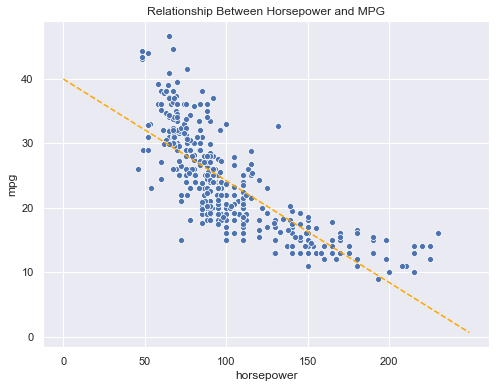

In [30]:
# Now let's plot the line over the actual values
plt.figure(figsize=(8, 6))

# Plotting the actual relationship between horsepower and mpg
sns.scatterplot(x='horsepower', y='mpg', data=mpg_df)

# Now plotting the line of best fit found by our model
axes = plt.gca()
x_vals = range(0, 250)
y_vals = b + m * x_vals
plt.plot(x_vals, y_vals, '--', color='orange')

plt.xticks(ticks=range(0, 250, 50))
plt.title('Relationship Between Horsepower and MPG')
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.

The below graph shows how the model chose that exact slope for the line of best fit, by showing the residual sum of squares as you change the slope of that line.

![Slope-RSS relationship image](slope-rss-relationship.png)

**Let's discuss!**

- **Student 1:** 

    - what is the above chart showing, and what slope did it arrive at? please include the name of what is shown in the above graph
    
---
    
- **Student 2:** 

    - which slope is better: `-0.2`, `-0.158` or `-0.1` ? how do we know?
    
---
    
- **Student 3:** 

    - using Zoom's annotate feature, imagine that you're starting at a slope towards the top upper left corner - picture how gradient descent would work as we arrive at the best possible slope for the line of best fit

## Decision Trees

In [161]:
# More imports

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
import graphviz

In [79]:
# Helper function from Bryan
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [74]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('auto-mpg-classification.csv')

In [78]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


**Student 4:**

Look at the target variable.

In [1]:
# Your code here

- any issues? how could you fix any issues that you see here?

### Interpreting Decision Trees

In [81]:
# Grabbing columns to set X and y
used_cols = [c for c in mpg_class.columns.tolist() if c not in ["target"]]
X, y = mpg_class[used_cols], mpg_class["target"]

In [82]:
# Defining our train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, 
                                                    random_state=0)

In [148]:
# Creating two different decision trees
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train['weight'].values.reshape(-1, 1), y_train)
dt_maxdepth1_v2.fit(X_train['origin'].values.reshape(-1, 1), y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

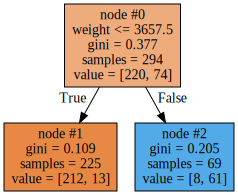

In [149]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, ['weight'])

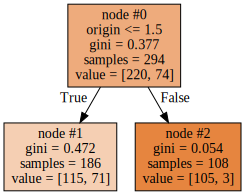

In [150]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, ['origin'])

**Let's Discuss!**

- **Student 5:**

    - which of these trees, in your opinion, does a better job splitting the data? how can you tell?

### Building a Decision Tree

**Student 6:**

In [2]:
# Start a new decision tree, dt, with whichever parameters you'd like to set

dt = None

In [3]:
# Fit it on the training data


**Student 7:**

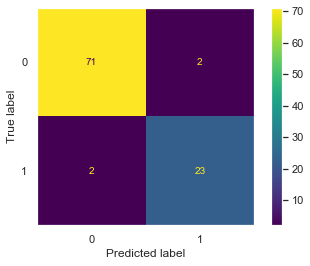

In [165]:
# Plotting the confusion matrix for the test data
plot_confusion_matrix(dt, X_test, y_test)
plt.grid(False) # This just removes an annoying grid that shows up by default
plt.show()

Define precision, recall and F1 score using the confusion matrix.

- Precision:
- Recall:
- F1 Score: 

In [158]:
# Now calculate them!

**Student 8:**

In [ ]:
# Create a random forest, doing a grid search to find some optimal parameters

rf = None

grid_params = None

grid_search = None
grid_search.fit(X_train, y_train)

In [ ]:
# Grabbing the best estimator as rf grid
rf_grid = grid_search.best_estimator_

rf_grid.fit(X_train, y_train)

In [ ]:
# Visualizing the ROCs for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, name="Decision Tree", ax=ax)
plot_roc_curve(rf_grid, X_test, y_test, name="RF after Grid Search", ax=ax)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
ax.legend()
plt.show()

**Student 9:**

- how did we do? which is the better ROC/AUC? how can you tell?